In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Анализ эффективности маркетинговой акции

Региональная компания «Фуджи Суши Friends» является сетью ресторанов японской и итальянской кухни. У нас есть сегментированные данные клиентов по группам в зависимости от количества заказов за год, а также уровень маржинальности в 20%, себестоимости продуктов в 35% и месячный оборот в 1 млн рублей. Необходимо проверить гипотезу по увеличению рентабельности после предоставления 50% скидки одной из групп клиентов. 


## Цель проекта.

Проверить гипотезу по увеличению рентабельности после предоставления 50% скидки одной из групп клиентов. 


## Задачи проекта.

Во время исследования необходимо решить следующие задачи:

1. Изучить исходные данные и провести их предобработку.
2. Визуализировать распределение клиентов. 
3. Рассчитать наиболее выгодный вариант реализации акции.


## Описание данных.
<div style="border:solid black 1px; padding: 20px">   
 
Имеется датафрейм *stats*: 
    
`amount` — суммарное количество клиентов в группе  
`group` — количество заказов в группе   
`prop` — доля группы от всех клиентов   
`prop_revenue` — доля группы от всей выручки

# Импортируем библиотеки и изучим данные.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Загрузим данные
path = 'C:\\Users\\Sergey\\Documents\\Python Scripts\\Тестовое для Фуджи\\'
try:
    df = pd.read_excel(path + 'Stats.xlsx')        # сегментированные данные о выручке
except:
    print('Error loading')

In [4]:
#Напишем функцию для вывода основной информации о ДФ.
NORM = '\033[0m'  # все атрибуты по умолчанию
BOLD = '\033[1m'  # жирный шрифт (интенсивный цвет)

df_list = [df]
def full_info(df_list):
    print(BOLD+'\n Первые 10 строк датафрейма:')
    display (df.head(12))
    print(BOLD+'\n Типы данных и общая информация: \n'+NORM)
    display(df.info())
    print(BOLD+'\n Статистики количественных переменных :')
    display(df.describe())
    print('*'*50)
    return

In [5]:
#Посмотрим на данные.
#full_info(df_list)

# Визуализация групп

In [6]:
df.set_index('group', inplace=True)

Для начала необходимо посчитать общее количество заказов в каждой группе, взяв среднее количество заказов диапазона в каждой.

In [7]:
df['orders'] = df['clients'] * df.index
df

,clients,prop,prop_revenue,orders
group,,,,
1.0,50814,31.640,7.87,50814.0
2.5,45157,28.120,16.68,112892.5
4.5,21298,13.260,14.49,95841.0
6.0,21050,13.110,18.92,126300.0
9.0,10130,6.310,13.51,91170.0
13.0,7136,4.440,13.34,92768.0
18.0,2697,1.680,6.78,48546.0
25.0,1711,1.070,5.61,42775.0
35.0,390,0.240,1.69,13650.0


In [8]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 1 else ''

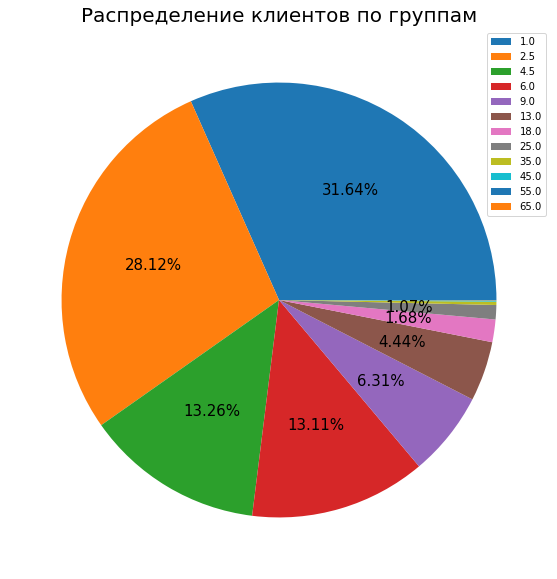

In [9]:
df.plot(y='clients', kind='pie', autopct=my_autopct, labels=None, label='', figsize=(10,10), fontsize=15)
plt.title('Распределение клиентов по группам', fontsize=20);

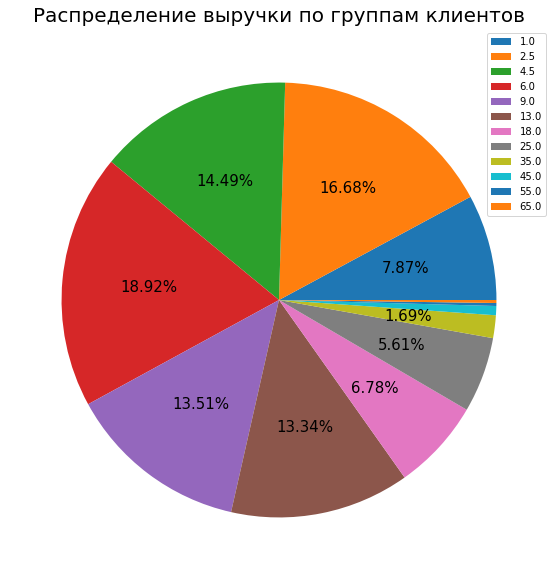

In [10]:
df.plot(y='prop_revenue', kind='pie', labels=None, label='', autopct=my_autopct, figsize=(10,10), fontsize=15)
plt.title('Распределение выручки по группам клиентов', fontsize=20);

## Вывод

<div style="border:solid green 2px; padding: 20px">

По данным круговым диаграммам видно, что несмотря на наиболее массовые группы клиентов **с 1-3 заказами (2/3 ото всех)** **наибольшую выручку** компании делают люди **с 2-7 заказами (половина выручки) и с 8-15 заказами (четверть выручки)**, поэтому наибольший эффект принесет работа именно с этими группами клиентов. Приступим к рассчетам. 

# Рассчёт наиболее выгодного варианта реализации акции.

Проведем расчеты прибыли при предоставлении определенной скидки определенной группе клиентов. Для начала посчитаем реальную выручку, затраты на продукты с каждой группы и прибыль, исходя из оборота в 1млн рублей. 

In [11]:
df['revenue'] = df['prop_revenue'] * 10000
df['cost'] = df['prop_revenue'] * 3500

In [12]:
df['return'] = df['revenue'].sum() - df.cost.sum() - 450000

In [13]:
df['revenue_50'] = 1.5 * df['revenue']

In [14]:
print('Текущая рентабельность составляет: {} %.'.format(round((df.revenue.sum() - df.cost.sum() - 450000) / 10000, 1)))

Текущая рентабельность составляет: 20.0 %.


Затем посчитаем выручку для каждой группы и прибыль с учетом 50% скидки всем клиентам одной определенной группы на такое же количество заказов. 

In [15]:
for i in df.index.to_list():
    df.loc[i, 'revenue_sum_50'] = df.revenue.sum() - df.loc[i, 'revenue'] + df.loc[i, 'revenue_50']

In [16]:
for i in df.index.to_list():
    df.loc[i, 'return_50'] = df.loc[i, 'revenue_sum_50'] - df.cost.sum() - df.loc[i, 'cost'] - 450000

In [17]:
df

,clients,prop,prop_revenue,orders,revenue,cost,return,revenue_50,revenue_sum_50,return_50
group,,,,,,,,,,
1.0,50814,31.640,7.87,50814.0,78700.0,27545.0,200065.0,118050.0,1039450.0,211870.0
2.5,45157,28.120,16.68,112892.5,166800.0,58380.0,200065.0,250200.0,1083500.0,225085.0
4.5,21298,13.260,14.49,95841.0,144900.0,50715.0,200065.0,217350.0,1072550.0,221800.0
6.0,21050,13.110,18.92,126300.0,189200.0,66220.0,200065.0,283800.0,1094700.0,228445.0
9.0,10130,6.310,13.51,91170.0,135100.0,47285.0,200065.0,202650.0,1067650.0,220330.0
13.0,7136,4.440,13.34,92768.0,133400.0,46690.0,200065.0,200100.0,1066800.0,220075.0
18.0,2697,1.680,6.78,48546.0,67800.0,23730.0,200065.0,101700.0,1034000.0,210235.0
25.0,1711,1.070,5.61,42775.0,56100.0,19635.0,200065.0,84150.0,1028150.0,208480.0
35.0,390,0.240,1.69,13650.0,16900.0,5915.0,200065.0,25350.0,1008550.0,202600.0


Аналогично посчитаем для 30% скидки.

In [18]:
df['revenue_30'] = 1.7 * df['revenue']
for i in df.index.to_list():
    df.loc[i, 'revenue_sum_30'] = df.revenue.sum() - df.loc[i, 'revenue'] + df.loc[i, 'revenue_30']
for i in df.index.to_list():
    df.loc[i, 'return_30'] = df.loc[i, 'revenue_sum_30'] - df.cost.sum() - df.loc[i, 'cost'] - 450000

In [19]:
df

,clients,prop,prop_revenue,orders,revenue,cost,return,revenue_50,revenue_sum_50,return_50,revenue_30,revenue_sum_30,return_30
group,,,,,,,,,,,,,
1.0,50814,31.640,7.87,50814.0,78700.0,27545.0,200065.0,118050.0,1039450.0,211870.0,133790.0,1055190.0,227610.0
2.5,45157,28.120,16.68,112892.5,166800.0,58380.0,200065.0,250200.0,1083500.0,225085.0,283560.0,1116860.0,258445.0
4.5,21298,13.260,14.49,95841.0,144900.0,50715.0,200065.0,217350.0,1072550.0,221800.0,246330.0,1101530.0,250780.0
6.0,21050,13.110,18.92,126300.0,189200.0,66220.0,200065.0,283800.0,1094700.0,228445.0,321640.0,1132540.0,266285.0
9.0,10130,6.310,13.51,91170.0,135100.0,47285.0,200065.0,202650.0,1067650.0,220330.0,229670.0,1094670.0,247350.0
13.0,7136,4.440,13.34,92768.0,133400.0,46690.0,200065.0,200100.0,1066800.0,220075.0,226780.0,1093480.0,246755.0
18.0,2697,1.680,6.78,48546.0,67800.0,23730.0,200065.0,101700.0,1034000.0,210235.0,115260.0,1047560.0,223795.0
25.0,1711,1.070,5.61,42775.0,56100.0,19635.0,200065.0,84150.0,1028150.0,208480.0,95370.0,1039370.0,219700.0
35.0,390,0.240,1.69,13650.0,16900.0,5915.0,200065.0,25350.0,1008550.0,202600.0,28730.0,1011930.0,205980.0


И для 15% скидки.

In [20]:
df['revenue_15'] = 1.85 * df['revenue']
for i in df.index.to_list():
    df.loc[i, 'revenue_sum_15'] = df.revenue.sum() - df.loc[i, 'revenue'] + df.loc[i, 'revenue_15']
for i in df.index.to_list():
    df.loc[i, 'return_15'] = df.loc[i, 'revenue_sum_15'] - df.cost.sum() - df.loc[i, 'cost'] - 450000

In [21]:
df

,clients,prop,prop_revenue,orders,revenue,cost,return,revenue_50,revenue_sum_50,return_50,revenue_30,revenue_sum_30,return_30,revenue_15,revenue_sum_15,return_15
group,,,,,,,,,,,,,,,,
1.0,50814,31.640,7.87,50814.0,78700.0,27545.0,200065.0,118050.0,1039450.0,211870.0,133790.0,1055190.0,227610.0,145595.0,1066995.0,239415.0
2.5,45157,28.120,16.68,112892.5,166800.0,58380.0,200065.0,250200.0,1083500.0,225085.0,283560.0,1116860.0,258445.0,308580.0,1141880.0,283465.0
4.5,21298,13.260,14.49,95841.0,144900.0,50715.0,200065.0,217350.0,1072550.0,221800.0,246330.0,1101530.0,250780.0,268065.0,1123265.0,272515.0
6.0,21050,13.110,18.92,126300.0,189200.0,66220.0,200065.0,283800.0,1094700.0,228445.0,321640.0,1132540.0,266285.0,350020.0,1160920.0,294665.0
9.0,10130,6.310,13.51,91170.0,135100.0,47285.0,200065.0,202650.0,1067650.0,220330.0,229670.0,1094670.0,247350.0,249935.0,1114935.0,267615.0
13.0,7136,4.440,13.34,92768.0,133400.0,46690.0,200065.0,200100.0,1066800.0,220075.0,226780.0,1093480.0,246755.0,246790.0,1113490.0,266765.0
18.0,2697,1.680,6.78,48546.0,67800.0,23730.0,200065.0,101700.0,1034000.0,210235.0,115260.0,1047560.0,223795.0,125430.0,1057730.0,233965.0
25.0,1711,1.070,5.61,42775.0,56100.0,19635.0,200065.0,84150.0,1028150.0,208480.0,95370.0,1039370.0,219700.0,103785.0,1047785.0,228115.0
35.0,390,0.240,1.69,13650.0,16900.0,5915.0,200065.0,25350.0,1008550.0,202600.0,28730.0,1011930.0,205980.0,31265.0,1014465.0,208515.0


Получаем такую сводную таблицу с прибылью при предоставлении определенной скидки определенной группе клиентов.

In [24]:
df.iloc[:, [1,2,3,6,9,12,15]]

,prop,prop_revenue,orders,return,return_50,return_30,return_15
group,,,,,,,
1.0,31.640,7.87,50814.0,200065.0,211870.0,227610.0,239415.0
2.5,28.120,16.68,112892.5,200065.0,225085.0,258445.0,283465.0
4.5,13.260,14.49,95841.0,200065.0,221800.0,250780.0,272515.0
6.0,13.110,18.92,126300.0,200065.0,228445.0,266285.0,294665.0
9.0,6.310,13.51,91170.0,200065.0,220330.0,247350.0,267615.0
13.0,4.440,13.34,92768.0,200065.0,220075.0,246755.0,266765.0
18.0,1.680,6.78,48546.0,200065.0,210235.0,223795.0,233965.0
25.0,1.070,5.61,42775.0,200065.0,208480.0,219700.0,228115.0
35.0,0.240,1.69,13650.0,200065.0,202600.0,205980.0,208515.0


In [28]:
df_new = df.iloc[:, [0,1,2,3,6,9,12,15]]
df_new

,clients,prop,prop_revenue,orders,return,return_50,return_30,return_15
group,,,,,,,,
1.0,50814,31.640,7.87,50814.0,200065.0,211870.0,227610.0,239415.0
2.5,45157,28.120,16.68,112892.5,200065.0,225085.0,258445.0,283465.0
4.5,21298,13.260,14.49,95841.0,200065.0,221800.0,250780.0,272515.0
6.0,21050,13.110,18.92,126300.0,200065.0,228445.0,266285.0,294665.0
9.0,10130,6.310,13.51,91170.0,200065.0,220330.0,247350.0,267615.0
13.0,7136,4.440,13.34,92768.0,200065.0,220075.0,246755.0,266765.0
18.0,2697,1.680,6.78,48546.0,200065.0,210235.0,223795.0,233965.0
25.0,1711,1.070,5.61,42775.0,200065.0,208480.0,219700.0,228115.0
35.0,390,0.240,1.69,13650.0,200065.0,202600.0,205980.0,208515.0


In [29]:
df_new.columns = ['Количество клиентов', '% ото всех клиентов', '% ото всей выручки', 'Кол-во заказов', 'Прибыль', 'Прибыль при 50% скидке', 'Прибыль при 30% скидке', 'Прибыль при 15% скидке']

In [30]:
df_new

,Количество клиентов,% ото всех клиентов,% ото всей выручки,Кол-во заказов,Прибыль,Прибыль при 50% скидке,Прибыль при 30% скидке,Прибыль при 15% скидке
group,,,,,,,,
1.0,50814,31.640,7.87,50814.0,200065.0,211870.0,227610.0,239415.0
2.5,45157,28.120,16.68,112892.5,200065.0,225085.0,258445.0,283465.0
4.5,21298,13.260,14.49,95841.0,200065.0,221800.0,250780.0,272515.0
6.0,21050,13.110,18.92,126300.0,200065.0,228445.0,266285.0,294665.0
9.0,10130,6.310,13.51,91170.0,200065.0,220330.0,247350.0,267615.0
13.0,7136,4.440,13.34,92768.0,200065.0,220075.0,246755.0,266765.0
18.0,2697,1.680,6.78,48546.0,200065.0,210235.0,223795.0,233965.0
25.0,1711,1.070,5.61,42775.0,200065.0,208480.0,219700.0,228115.0
35.0,390,0.240,1.69,13650.0,200065.0,202600.0,205980.0,208515.0


## Вывод

<div style="border:solid green 2px; padding: 20px">

По данной таблице видно, что предсказуемо самая высокая прибыль будет с наименьшей скидкой в 15%. При этом, **наибольшая прибыль** применительно к группам получается **при предоставлении любой скидки группе клиентов с 5-7 заказами**. Расчеты произведены с учетом допущения такого же дополнительного количества заказов каждым клиентом в группе. 